# Twitter Fake News Classification

### Liam Caulfield

### May 30, 2023

Comparison of Naive Bayes and Neural Network in identifying fake news from twitter dataset.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
data = pd.read_csv('FakeNewsNet.csv')

In [ ]:
data.head(1)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1


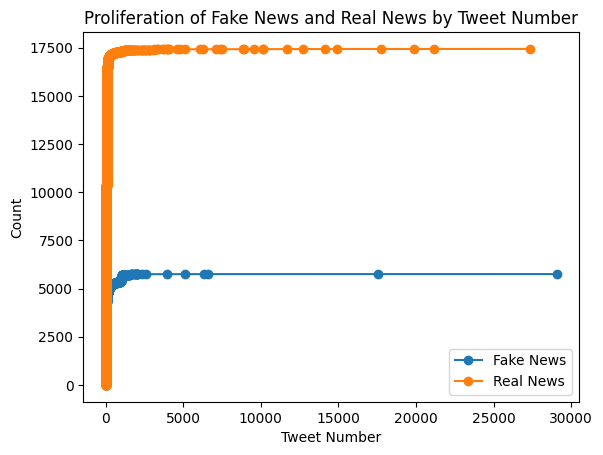

In [ ]:
# Filter the dataset for fake news and real news
fake_news_data = data[data['real'] == 0]
real_news_data = data[data['real'] == 1]

# Sort the data by tweet_num for fake news
sorted_fake_data = fake_news_data.sort_values(by='tweet_num')

# Sort the data by tweet_num for real news
sorted_real_data = real_news_data.sort_values(by='tweet_num')

# Create the line plots for fake and real news
plt.plot(sorted_fake_data['tweet_num'], range(len(sorted_fake_data)), marker='o', label='Fake News')
plt.plot(sorted_real_data['tweet_num'], range(len(sorted_real_data)), marker='o', label='Real News')

plt.xlabel('Tweet Number')
plt.ylabel('Count')
plt.title('Proliferation of Fake News and Real News by Tweet Number')
plt.legend()
plt.show()

In [ ]:
# Naive Bayes approach
# Split the dataset into input features (X) and target variable (y)
X = data['title']
y = data['real']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Vectorize the input features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8433189655172414


Iterative Approach:

*Random State = 42*
Test size=.2 -> Accuracy = 83.34%
Test size=.25 -> Accuracy = 83.49%
Test size=.3 -> Accuracy = 82.84%

*Random State = 30*
Test size = .2 -> Accuracy = 84.33%
Test size = .25 -> Accuracy = 84.20%
Test size = .3 -> Accuracy = 84.02%

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 735  417]
 [ 310 3178]]


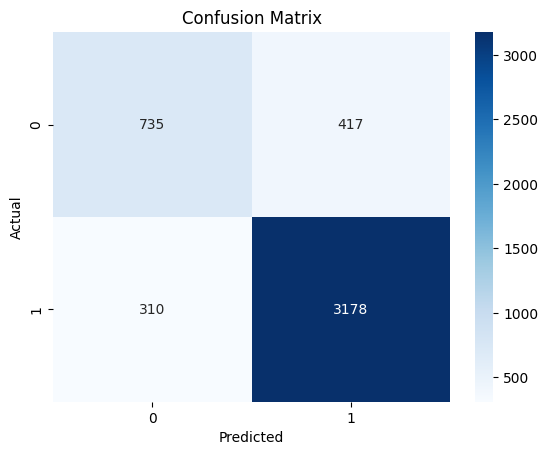

In [ ]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Create a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67      1152
           1       0.88      0.91      0.90      3488

    accuracy                           0.84      4640
   macro avg       0.79      0.77      0.78      4640
weighted avg       0.84      0.84      0.84      4640



**Classification Report Findings:**

*Precision:*

For class 0 (fake news), the precision is 0.70, indicating that when the model predicts an article as fake, it is correct around 70% of the time.
For class 1 (real news), the precision is 0.88, suggesting that when the model predicts an article as real, it is accurate around 88% of the time.

*Recall:*

For class 0 (fake news), the recall is 0.64, indicating that the model correctly identifies around 64% of the actual fake news articles.
For class 1 (real news), the recall is 0.91, suggesting that the model successfully identifies around 91% of the actual real news articles.

*F1-score:*

The F1-score is a harmonic mean of precision and recall, providing a balanced measure of the model's performance.
For class 0 (fake news), the F1-score is 0.67, which considers both precision and recall.
For class 1 (real news), the F1-score is 0.90, reflecting a good balance between precision and recall.

*Accuracy:*

The overall accuracy of the Naive Bayes model on the test set is 0.84, meaning that it correctly classifies around 84% of the news articles.

*Macro Average:*

The macro average of precision, recall, and F1-score calculates the metrics independently for each class and then takes the average.
The macro average precision, recall, and F1-score are all around 0.79, indicating a reasonable performance across both classes.

*Weighted Average:*

The weighted average of precision, recall, and F1-score takes into account the class imbalance by considering the support (number of samples) for each class.
The weighted average precision, recall, and F1-score are all around 0.84, reflecting the model's performance while considering the class distribution.

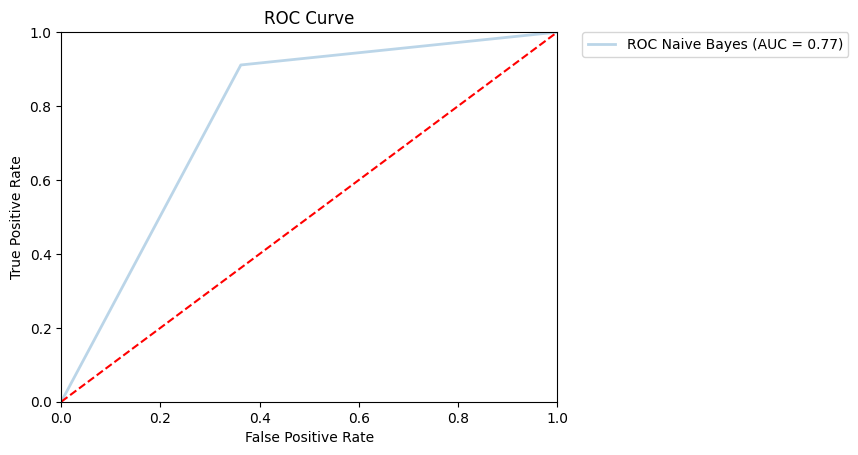

In [ ]:
# ROC curve
# Save values for ROC curve comparison
y_test_nb, y_pred_nb = y_test, y_pred

# Find ROC curve
fp, tp, th = roc_curve(y_test, y_pred)
roc_auc_mla = auc(fp, tp)

# Plot ROC curve
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % ('Naive Bayes', roc_auc_mla))

plt.title('ROC Curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4640 samples in 0.001s...
[t-SNE] Computed neighbors for 4640 samples in 0.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4640
[t-SNE] Computed conditional probabilities for sample 2000 / 4640
[t-SNE] Computed conditional probabilities for sample 3000 / 4640
[t-SNE] Computed conditional probabilities for sample 4000 / 4640
[t-SNE] Computed conditional probabilities for sample 4640 / 4640
[t-SNE] Mean sigma: 0.074023
[t-SNE] Computed conditional probabilities in 0.309s
[t-SNE] Iteration 50: error = 81.8290710, gradient norm = 0.0000001 (50 iterations in 2.066s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 81.829071
[t-SNE] Iteration 100: error = 2.4498599, gradient norm = 0.0205110 (50 iterations in 2.861s)
[t-SNE] Iteration 150: error = 1.9407444, gradient norm = 0.0138574 (50 iterations in 1.925s)
[t-SNE] Iteration 200: error = 

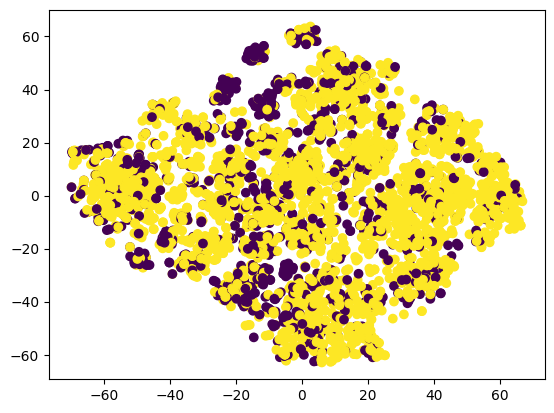

In [ ]:
# https://stackoverflow.com/questions/37718347/plotting-decision-boundary-for-high-dimension-data
# Truncate and then embed the dimensions into two components to attempt to visualize a decision boundary
X_test_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_test)
X_test_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_test_reduced)

plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=y_test)
plt.show()

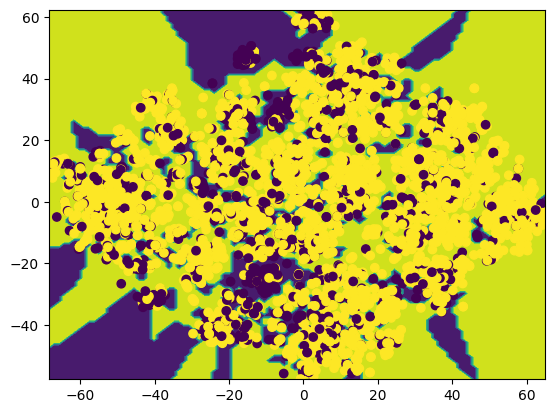

In [ ]:
# https://stackoverflow.com/questions/61225052/svm-plot-decision-surface-when-working-with-more-than-2-features
# Use K Nearest Neighbors and Voronoi tesselation to attempt to plot a decision surface

# Create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_test_embedded[:,0]), np.max(X_test_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_test_embedded[:,1]), np.max(X_test_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# Approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_test_embedded, y_pred)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

# Plot the points
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_test_embedded[:,0], X_test_embedded[:,1], c=y_test)
plt.show()





In [ ]:
# Neural Network approach
# Split the dataset into input features (X) and target variable (y)
X = data['title'].astype(str)  # Convert to string type
y = data['real']

# Convert X to a list of strings
X = X.tolist()

In [ ]:
# Vectorize the input features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
# Convert the sparse matrix to dense matrix
X = X.toarray()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
580/580 [==============================] - 11s 17ms/step - loss: 0.4132 - accuracy: 0.8227
Epoch 2/10
580/580 [==============================] - 10s 18ms/step - loss: 0.2469 - accuracy: 0.8980
Epoch 3/10
580/580 [==============================] - 11s 19ms/step - loss: 0.1450 - accuracy: 0.9429
Epoch 4/10
580/580 [==============================] - 10s 18ms/step - loss: 0.0754 - accuracy: 0.9730
Epoch 5/10
580/580 [==============================] - 9s 16ms/step - loss: 0.0423 - accuracy: 0.9837
Epoch 6/10
580/580 [==============================] - 10s 17ms/step - loss: 0.0286 - accuracy: 0.9891
Epoch 7/10
580/580 [==============================] - 10s 17ms/step - loss: 0.0228 - accuracy: 0.9909
Epoch 8/10
580/580 [==============================] - 12s 21ms/step - loss: 0.0182 - accuracy: 0.9916
Epoch 9/10
580/580 [==============================] - 10s 18ms/step - loss: 0.0166 - accuracy: 0.9916
Epoch 10/10
580/580 [==============================] - 9s 16ms/step - loss: 0.0152 

**Training Neural Network Findings:**
Our neural network model achieved a high level of accuracy throughout the training process. The accuracy steadily improved over the course of the epochs, starting at approximately 82.16% in the first epoch and reaching around 99.22% by the tenth epoch.

The loss value, which represents the difference between the predicted and actual values, decreased significantly during training - indicating the model's ability to produce increasingly accurate predictions throughout its training.

Overall, the training results suggest that the neural network model was able to learn from the input features (titles) and successfully classify the news articles as either real or fake with a high level of accuracy.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

145/145 [==============================] - 1s 6ms/step - loss: 1.0045 - accuracy: 0.8256
Test Loss: 1.0045245885849
Test Accuracy: 0.8256465792655945


**Model Evaluation Findings:**
Our neural network model achieved an accuracy of approximately 82.61% - meaning our model correctly classified around 82.61% of the news articles in the test set as either real or fake based on their titles.

The test loss value, which represents the difference between the predicted and actual values, was measured at 1.023.

Overall, the evaluation results suggest that the neural network model generalized well to the unseen data in the test set, achieving a reasonably high accuracy.

In [ ]:
# Assuming you already have trained your neural network model and obtained predictions on the test set
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions

# Convert predictions and true labels to 1D arrays
y_pred = y_pred.flatten()
y_true = y_test

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print(report)

145/145 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1131
           1       0.87      0.90      0.89      3509

    accuracy                           0.83      4640
   macro avg       0.77      0.75      0.76      4640
weighted avg       0.82      0.83      0.82      4640



Precision: Precision is the ratio of true positive predictions to the total number of positive predictions. For class 0, the precision is 0.67, indicating that 67% of the predicted "0" values are correct. For class 1, the precision is 0.87, suggesting that 87% of the predicted "1" values are correct.

Recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances. For class 0, the recall is 0.57, indicating that 57% of the actual "0" values are correctly identified. For class 1, the recall is 0.91, meaning that 91% of the actual "1" values are correctly identified.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives. For class 0, the F1-score is 0.61, indicating a balance between precision and recall for the "0" class. For class 1, the F1-score is 0.89, representing a good balance between precision and recall for the "1" class.

Support: The support refers to the number of samples or instances of each class in the test dataset. In this case, there are 1131 instances of class 0 and 3509 instances of class 1.

Accuracy: The accuracy is the overall correctness of the predictions, calculated as the ratio of correct predictions to the total number of instances. In this case, the accuracy is 0.83, indicating that the neural network model correctly classifies 83% of the instances.

Macro average: The macro average calculates the average metrics across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score in this report are 0.77, 0.74, and 0.75, respectively.

Weighted average: The weighted average calculates the average metrics across all classes, weighted by the support or the number of instances in each class. The weighted average precision, recall, and F1-score in this report are 0.82, 0.83, and 0.82, respectively.

[[ 678  453]
 [ 356 3153]]


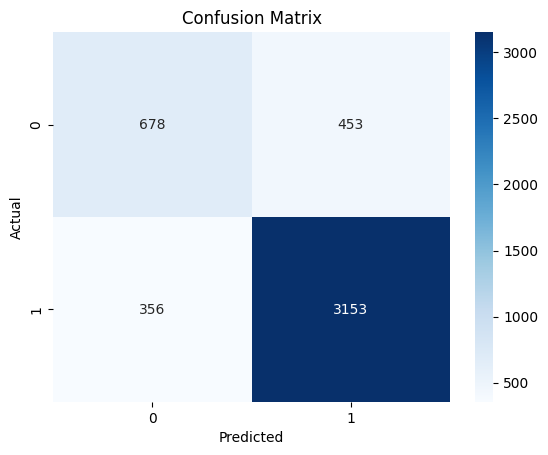

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

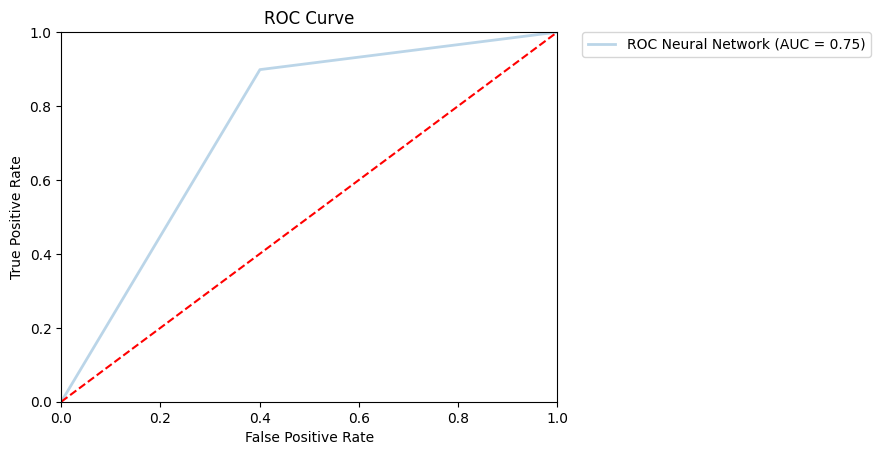

In [ ]:
# ROC curve
# Save values for ROC curve comparison
y_test_nn, y_pred_nn = y_true, y_pred

# Find ROC curve
fp, tp, th = roc_curve(y_true, y_pred)
roc_auc_mla = auc(fp, tp)

# Plot ROC curve
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % ('Neural Network', roc_auc_mla))

plt.title('ROC Curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Epoch 1/10
464/464 [==============================] - 6s 13ms/step - loss: 0.0135 - accuracy: 0.9929 - val_loss: 0.0162 - val_accuracy: 0.9911
Epoch 2/10
464/464 [==============================] - 7s 15ms/step - loss: 0.0114 - accuracy: 0.9940 - val_loss: 0.0203 - val_accuracy: 0.9914
Epoch 3/10
464/464 [==============================] - 12s 26ms/step - loss: 0.0111 - accuracy: 0.9939 - val_loss: 0.0262 - val_accuracy: 0.9903
Epoch 4/10
464/464 [==============================] - 10s 22ms/step - loss: 0.0099 - accuracy: 0.9947 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 5/10
464/464 [==============================] - 6s 13ms/step - loss: 0.0093 - accuracy: 0.9946 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 6/10
464/464 [==============================] - 7s 14ms/step - loss: 0.0090 - accuracy: 0.9947 - val_loss: 0.0410 - val_accuracy: 0.9898
Epoch 7/10
464/464 [==============================] - 6s 13ms/step - loss: 0.0084 - accuracy: 0.9950 - val_loss: 0.0456 - val_accuracy: 0.98

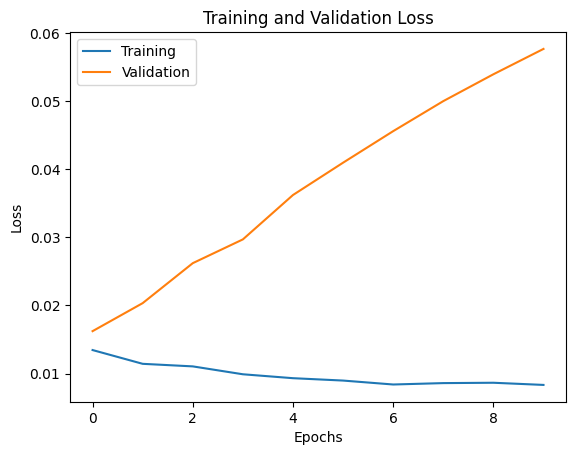

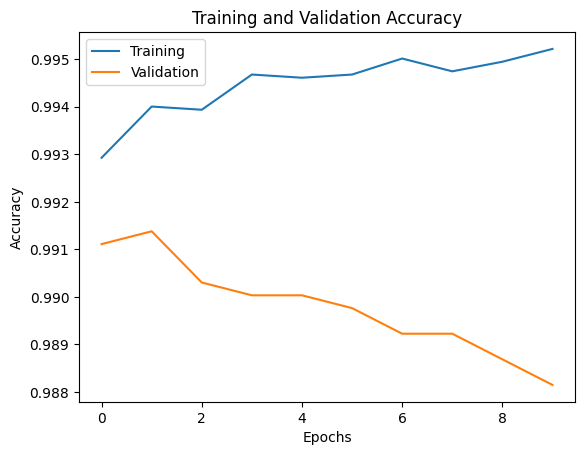

In [ ]:
# Train the neural network model and capture the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()


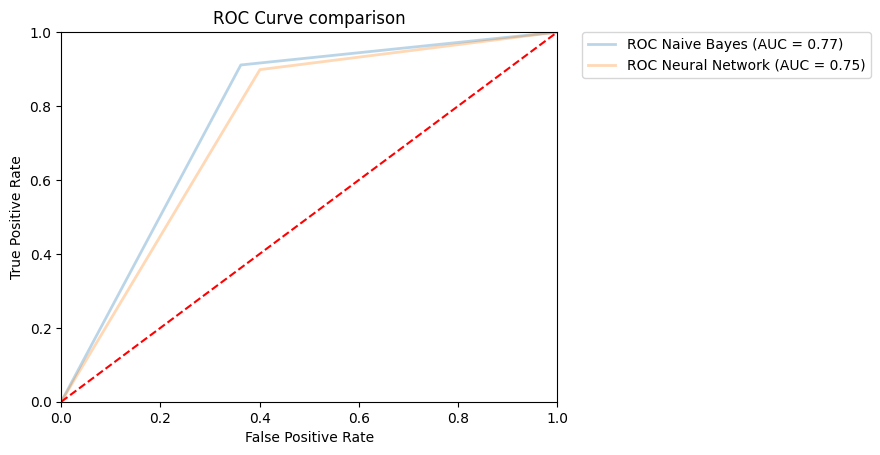

In [ ]:
# https://dibyendudeb.com/comparing-machine-learning-algorithms/#Code_for_comparing_different_machine_learning_algorithms
# ROC curve comparison
# Find and plot Naive Bayes ROC curve
fp, tp, th = roc_curve(y_test_nb, y_pred_nb)
roc_auc_mla = auc(fp, tp)
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % ('Naive Bayes', roc_auc_mla))

# Find and plot neural network ROC curve
fp, tp, th = roc_curve(y_test_nn, y_pred_nn)
roc_auc_mla = auc(fp, tp)
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % ('Neural Network', roc_auc_mla))

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Model Comparison:**

The neural network and Naive Bayes classifiers both performed well, but the Naive Bayes classifier performed slightly better on all scores from their respective classification reports. The Naive Bayes classifier had an 84.02% accuracy in comparison to the neural network's 82.61% accuracy. The 1.41% difference is equivalent to 327 misclassified articles.

An ROC curve comparison was plotted that shows an AUC of 0.77 for the Naive Bayes classifier in comparison to 0.75 for the neural network model. This reinforces the conclusion that the Naive Bayes classifier performed better than the neural network model for this classification task.